## Using Pandas to Analyze a Barangay-level COVID-19 Dataset

As part of my journey toward data science, I have been studying Pandas, the most popular library in the scientific Python ecosystem for doing data analysis. In this post, I highlight some features of Pandas using a barangay-level dataset of COVID-19 cases in Malabon City. This Jupyter notebook is organized as follows. Section 1 imports libraries and reads raw data, and Section 2 tidies raw data. In Section 3, we perform simple data analysis and visualizations. The last section concludes.

### 1. Import libraries and read data

First, we import all necessary libraries: Pandas (of course), Matplotlib (for the data visualizations), and NumPy (for the numerical computations):

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

The raw data is available to the public and uploaded in my GitHub. Let's read the dataset from the GitHub repository:

In [3]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid_malabon/master/covid_malabon_jupyter_june29.csv'
df1 = pd.read_csv(url1, header=0, index_col=0)

### 2. Tidying data

Let us have a quick snapshot of the dataset. The file contains longitudinal information on the cumulative number of confirmed cases, deaths, and recoveries for 23 sub-units in Malabon City (21 barangays, unconfirmed address, and outside the city) from 26 March 2020 to 26 June 2020. This gives a total of 2,139 observations.

In [4]:
df1.head()

,barangay,brgy,confirmed_cases,deaths,recovered
date,,,,,
26-Mar-20,1,Acacia,0,0,0
27-Mar-20,1,Acacia,0,0,0
28-Mar-20,1,Acacia,0,0,0
29-Mar-20,1,Acacia,0,0,0
30-Mar-20,1,Acacia,0,0,0


In [5]:
df1.tail()

,barangay,brgy,confirmed_cases,deaths,recovered
date,,,,,
25-Jun-20,23,Outside Malabon,4,0,3
26-Jun-20,23,Outside Malabon,4,0,3
27-Jun-20,23,Outside Malabon,4,0,3
28-Jun-20,23,Outside Malabon,4,0,3
29-Jun-20,23,Outside Malabon,4,0,3


In [6]:
df1.index

Index(['26-Mar-20', '27-Mar-20', '28-Mar-20', '29-Mar-20', '30-Mar-20',
       '31-Mar-20', '1-Apr-20', '2-Apr-20', '3-Apr-20', '4-Apr-20',
       ...
       '20-Jun-20', '21-Jun-20', '22-Jun-20', '23-Jun-20', '24-Jun-20',
       '25-Jun-20', '26-Jun-20', '27-Jun-20', '28-Jun-20', '29-Jun-20'],
      dtype='object', name='date', length=2208)

In [7]:
df1.brgy.unique()

array(['Acacia', 'Baritan', 'Bayan-Bayanan', 'Catmon', 'Concepcion',
       'Dampalit', 'Flores', 'Hulong Duhat', 'Ibaba', 'Longos', 'Maysilo',
       'Muzon', 'Niugan', 'Panghulo', 'Potrero', 'San Agustin',
       'Santulan', 'Tanong', 'Tinajeros', 'Tonsuya', 'Tugatog',
       'Unconfirmed Address', 'Outside Malabon'], dtype=object)

In [8]:
len(df1.brgy.unique())

23

In [9]:
df1.describe()

,barangay,confirmed_cases,deaths,recovered
count,2208.000000,2208.000000,2208.000000,2208.000000
mean,12.000000,5.772192,0.723732,1.988225
std,6.634752,9.629719,1.591988,3.944661
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000
50%,12.000000,2.000000,0.000000,0.000000
75%,18.000000,6.000000,1.000000,2.000000
max,23.000000,73.000000,12.000000,37.000000


Let us tidy things up in the raw file. First, let us parse the time series information, which are the dates, in the raw file and convert it to datetime64 dtype.

In [10]:
date = pd.to_datetime(df1.index)

In [11]:
date

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04',
               ...
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
               '2020-06-28', '2020-06-29'],
              dtype='datetime64[ns]', name='date', length=2208, freq=None)

We can now construct our index. It has two levels, the barangay and the date.

In [12]:
index = pd.MultiIndex.from_arrays([df1.brgy, date], names=['brgy_name', 'date'])

In [13]:
index

MultiIndex([(         'Acacia', '2020-03-26'),
            (         'Acacia', '2020-03-27'),
            (         'Acacia', '2020-03-28'),
            (         'Acacia', '2020-03-29'),
            (         'Acacia', '2020-03-30'),
            (         'Acacia', '2020-03-31'),
            (         'Acacia', '2020-04-01'),
            (         'Acacia', '2020-04-02'),
            (         'Acacia', '2020-04-03'),
            (         'Acacia', '2020-04-04'),
            ...
            ('Outside Malabon', '2020-06-20'),
            ('Outside Malabon', '2020-06-21'),
            ('Outside Malabon', '2020-06-22'),
            ('Outside Malabon', '2020-06-23'),
            ('Outside Malabon', '2020-06-24'),
            ('Outside Malabon', '2020-06-25'),
            ('Outside Malabon', '2020-06-26'),
            ('Outside Malabon', '2020-06-27'),
            ('Outside Malabon', '2020-06-28'),
            ('Outside Malabon', '2020-06-29')],
           names=['brgy_name', 'date'], len

In [14]:
df1.set_index(index, inplace=True)

In [15]:
df1

barangay             brgy  confirmed_cases  \
brgy_name       date                                                     
Acacia          2020-03-26         1           Acacia                0   
                2020-03-27         1           Acacia                0   
                2020-03-28         1           Acacia                0   
                2020-03-29         1           Acacia                0   
                2020-03-30         1           Acacia                0   
...                              ...              ...              ...   
Outside Malabon 2020-06-25        23  Outside Malabon                4   
                2020-06-26        23  Outside Malabon                4   
                2020-06-27        23  Outside Malabon                4   
                2020-06-28        23  Outside Malabon                4   
                2020-06-29        23  Outside Malabon                4   

                            deaths  recovered  
brgy_name       date                           
Acacia          2020-03-26       0          0  
                2020-03-27       0          0  
                2020-03-28       0          0  
                2020-03-29       0          0  
                2020-03-30       0          0  
...                            ...        ...  
Outside Malabon 2020-06-25       0          3  
                2020-06-26       0          3  
                2020-06-27       0          3  
                2020-06-28       0          3  
                2020-06-29       0          3  

[2208 rows x 5 columns]

In [16]:
df1.index

MultiIndex([(         'Acacia', '2020-03-26'),
            (         'Acacia', '2020-03-27'),
            (         'Acacia', '2020-03-28'),
            (         'Acacia', '2020-03-29'),
            (         'Acacia', '2020-03-30'),
            (         'Acacia', '2020-03-31'),
            (         'Acacia', '2020-04-01'),
            (         'Acacia', '2020-04-02'),
            (         'Acacia', '2020-04-03'),
            (         'Acacia', '2020-04-04'),
            ...
            ('Outside Malabon', '2020-06-20'),
            ('Outside Malabon', '2020-06-21'),
            ('Outside Malabon', '2020-06-22'),
            ('Outside Malabon', '2020-06-23'),
            ('Outside Malabon', '2020-06-24'),
            ('Outside Malabon', '2020-06-25'),
            ('Outside Malabon', '2020-06-26'),
            ('Outside Malabon', '2020-06-27'),
            ('Outside Malabon', '2020-06-28'),
            ('Outside Malabon', '2020-06-29')],
           names=['brgy_name', 'date'], len

Renaming the column names:

In [17]:
df1.columns

Index(['barangay', 'brgy', 'confirmed_cases', 'deaths', 'recovered'], dtype='object')

In [18]:
del df1['brgy']

In [19]:
df1.columns = ['brgy_id', 'confirmed', 'death', 'recovered']

In [20]:
df1

brgy_id  confirmed  death  recovered
brgy_name       date                                            
Acacia          2020-03-26        1          0      0          0
                2020-03-27        1          0      0          0
                2020-03-28        1          0      0          0
                2020-03-29        1          0      0          0
                2020-03-30        1          0      0          0
...                             ...        ...    ...        ...
Outside Malabon 2020-06-25       23          4      0          3
                2020-06-26       23          4      0          3
                2020-06-27       23          4      0          3
                2020-06-28       23          4      0          3
                2020-06-29       23          4      0          3

[2208 rows x 4 columns]

Incoporating demographic data allows for a richer analysis. Let's create a data frame from a dictionary of population, area, and population density lists, data taken from the National Statistical Coordination Board (NSCB). We also exploit number of violators data taken from the Philippine National Police (PNP).

In [21]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid_malabon/master/pop-violators.csv'

In [22]:
df2 = pd.read_csv(url2, index_col=0)

In [23]:
df3 = df1.join(df2, on='brgy_name')

In [24]:
df3

brgy_id  confirmed  death  recovered  district  \
brgy_name       date                                                         
Acacia          2020-03-26        1          0      0          0       2.0   
                2020-03-27        1          0      0          0       2.0   
                2020-03-28        1          0      0          0       2.0   
                2020-03-29        1          0      0          0       2.0   
                2020-03-30        1          0      0          0       2.0   
...                             ...        ...    ...        ...       ...   
Outside Malabon 2020-06-25       23          4      0          3       NaN   
                2020-06-26       23          4      0          3       NaN   
                2020-06-27       23          4      0          3       NaN   
                2020-06-28       23          4      0          3       NaN   
                2020-06-29       23          4      0          3       NaN   

                            population   area  popden  violators  
brgy_name       date                                              
Acacia          2020-03-26      5735.0  19.54   293.5      294.0  
                2020-03-27      5735.0  19.54   293.5      294.0  
                2020-03-28      5735.0  19.54   293.5      294.0  
                2020-03-29      5735.0  19.54   293.5      294.0  
                2020-03-30      5735.0  19.54   293.5      294.0  
...                                ...    ...     ...        ...  
Outside Malabon 2020-06-25         NaN    NaN     NaN        NaN  
                2020-06-26         NaN    NaN     NaN        NaN  
                2020-06-27         NaN    NaN     NaN        NaN  
                2020-06-28         NaN    NaN     NaN        NaN  
                2020-06-29         NaN    NaN     NaN        NaN  

[2208 rows x 9 columns]

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2208 entries, ('Acacia', Timestamp('2020-03-26 00:00:00')) to ('Outside Malabon', Timestamp('2020-06-29 00:00:00'))
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brgy_id     2208 non-null   int64  
 1   confirmed   2208 non-null   int64  
 2   death       2208 non-null   int64  
 3   recovered   2208 non-null   int64  
 4   district    2016 non-null   float64
 5   population  2016 non-null   float64
 6   area        2016 non-null   float64
 7   popden      2016 non-null   float64
 8   violators   2016 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 160.6+ KB


In [26]:
df3.fillna(0, inplace=True)
df3.loc[:, ['district', 'population', 'violators']] = df3.loc[:, ['district', 'population', 'violators']].astype('int64')

In [27]:
df3

brgy_id  confirmed  death  recovered  district  \
brgy_name       date                                                         
Acacia          2020-03-26        1          0      0          0         2   
                2020-03-27        1          0      0          0         2   
                2020-03-28        1          0      0          0         2   
                2020-03-29        1          0      0          0         2   
                2020-03-30        1          0      0          0         2   
...                             ...        ...    ...        ...       ...   
Outside Malabon 2020-06-25       23          4      0          3         0   
                2020-06-26       23          4      0          3         0   
                2020-06-27       23          4      0          3         0   
                2020-06-28       23          4      0          3         0   
                2020-06-29       23          4      0          3         0   

                            population   area  popden  violators  
brgy_name       date                                              
Acacia          2020-03-26        5735  19.54   293.5        294  
                2020-03-27        5735  19.54   293.5        294  
                2020-03-28        5735  19.54   293.5        294  
                2020-03-29        5735  19.54   293.5        294  
                2020-03-30        5735  19.54   293.5        294  
...                                ...    ...     ...        ...  
Outside Malabon 2020-06-25           0   0.00     0.0          0  
                2020-06-26           0   0.00     0.0          0  
                2020-06-27           0   0.00     0.0          0  
                2020-06-28           0   0.00     0.0          0  
                2020-06-29           0   0.00     0.0          0  

[2208 rows x 9 columns]

In [28]:
df3 = df3[['brgy_id', 'district', 'population', 'area', 'popden', 'confirmed', 'death', 'recovered', 'violators']]

In [29]:
df3

brgy_id  district  population   area  popden  \
brgy_name       date                                                       
Acacia          2020-03-26        1         2        5735  19.54   293.5   
                2020-03-27        1         2        5735  19.54   293.5   
                2020-03-28        1         2        5735  19.54   293.5   
                2020-03-29        1         2        5735  19.54   293.5   
                2020-03-30        1         2        5735  19.54   293.5   
...                             ...       ...         ...    ...     ...   
Outside Malabon 2020-06-25       23         0           0   0.00     0.0   
                2020-06-26       23         0           0   0.00     0.0   
                2020-06-27       23         0           0   0.00     0.0   
                2020-06-28       23         0           0   0.00     0.0   
                2020-06-29       23         0           0   0.00     0.0   

                            confirmed  death  recovered  violators  
brgy_name       date                                                
Acacia          2020-03-26          0      0          0        294  
                2020-03-27          0      0          0        294  
                2020-03-28          0      0          0        294  
                2020-03-29          0      0          0        294  
                2020-03-30          0      0          0        294  
...                               ...    ...        ...        ...  
Outside Malabon 2020-06-25          4      0          3          0  
                2020-06-26          4      0          3          0  
                2020-06-27          4      0          3          0  
                2020-06-28          4      0          3          0  
                2020-06-29          4      0          3          0  

[2208 rows x 9 columns]

Since the dataset is barangay-level, we can generate a set of series for city-wide variables. Appending this to our current dataframe allows us to do both city-wide and barangay-level data analysis.

In [30]:
malabon = df3.sum(level=1)

In [31]:
malabon

,brgy_id,district,population,area,popden,confirmed,death,recovered,violators
date,,,,,,,,,
2020-03-26,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-27,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-28,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-29,276,27,353335,1570.52,6971.95,0,0,0,8593
2020-03-30,276,27,353335,1570.52,6971.95,0,0,0,8593
...,...,...,...,...,...,...,...,...,...
2020-06-25,276,27,353335,1570.52,6971.95,401,51,161,8593
2020-06-26,276,27,353335,1570.52,6971.95,414,53,168,8593
2020-06-27,276,27,353335,1570.52,6971.95,428,53,170,8593


In [32]:
malabon['brgy_id'] = 24
malabon['district'] = 0

In [33]:
malabon.insert(0, 'brgy_name', 'Malabon City')

In [34]:
malabon

,brgy_name,brgy_id,district,population,area,popden,confirmed,death,recovered,violators
date,,,,,,,,,,
2020-03-26,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-27,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-28,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-29,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
2020-03-30,Malabon City,24,0,353335,1570.52,6971.95,0,0,0,8593
...,...,...,...,...,...,...,...,...,...,...
2020-06-25,Malabon City,24,0,353335,1570.52,6971.95,401,51,161,8593
2020-06-26,Malabon City,24,0,353335,1570.52,6971.95,414,53,168,8593
2020-06-27,Malabon City,24,0,353335,1570.52,6971.95,428,53,170,8593


In [35]:
type(malabon)

pandas.core.frame.DataFrame

In [36]:
malabon.index

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
      

In [37]:
malabon.set_index(['brgy_name', malabon.index], inplace=True)

In [38]:
malabon

brgy_id  district  population     area   popden  \
brgy_name    date                                                          
Malabon City 2020-03-26       24         0      353335  1570.52  6971.95   
             2020-03-27       24         0      353335  1570.52  6971.95   
             2020-03-28       24         0      353335  1570.52  6971.95   
             2020-03-29       24         0      353335  1570.52  6971.95   
             2020-03-30       24         0      353335  1570.52  6971.95   
...                          ...       ...         ...      ...      ...   
             2020-06-25       24         0      353335  1570.52  6971.95   
             2020-06-26       24         0      353335  1570.52  6971.95   
             2020-06-27       24         0      353335  1570.52  6971.95   
             2020-06-28       24         0      353335  1570.52  6971.95   
             2020-06-29       24         0      353335  1570.52  6971.95   

                         confirmed  death  recovered  violators  
brgy_name    date                                                
Malabon City 2020-03-26          0      0          0       8593  
             2020-03-27          0      0          0       8593  
             2020-03-28          0      0          0       8593  
             2020-03-29          0      0          0       8593  
             2020-03-30          0      0          0       8593  
...                            ...    ...        ...        ...  
             2020-06-25        401     51        161       8593  
             2020-06-26        414     53        168       8593  
             2020-06-27        428     53        170       8593  
             2020-06-28        457     53        183       8593  
             2020-06-29        468     53        210       8593  

[96 rows x 9 columns]

In [39]:
df3 = df3.append(malabon)

In [40]:
df3

brgy_id  district  population     area   popden  \
brgy_name    date                                                          
Acacia       2020-03-26        1         2        5735    19.54   293.50   
             2020-03-27        1         2        5735    19.54   293.50   
             2020-03-28        1         2        5735    19.54   293.50   
             2020-03-29        1         2        5735    19.54   293.50   
             2020-03-30        1         2        5735    19.54   293.50   
...                          ...       ...         ...      ...      ...   
Malabon City 2020-06-25       24         0      353335  1570.52  6971.95   
             2020-06-26       24         0      353335  1570.52  6971.95   
             2020-06-27       24         0      353335  1570.52  6971.95   
             2020-06-28       24         0      353335  1570.52  6971.95   
             2020-06-29       24         0      353335  1570.52  6971.95   

                         confirmed  death  recovered  violators  
brgy_name    date                                                
Acacia       2020-03-26          0      0          0        294  
             2020-03-27          0      0          0        294  
             2020-03-28          0      0          0        294  
             2020-03-29          0      0          0        294  
             2020-03-30          0      0          0        294  
...                            ...    ...        ...        ...  
Malabon City 2020-06-25        401     51        161       8593  
             2020-06-26        414     53        168       8593  
             2020-06-27        428     53        170       8593  
             2020-06-28        457     53        183       8593  
             2020-06-29        468     53        210       8593  

[2304 rows x 9 columns]

We can create a new column for active cases and, using demographic data, variables in per capita terms. We can also generate daily new cases, deaths, and recoveries from the cumulative counts as well as seven-day moving averages. We can even generate case fatality rates at the barangay level.

In [41]:
df3 = df3.assign(active = lambda x: x.confirmed - x.death - x.recovered)
df3 = df3.assign(confirmed_pc_4k = lambda x: 4000 * x.confirmed / x.population)
df3 = df3.assign(death_pc_4k = lambda x: 4000 * x.death / x.population)
df3 = df3.assign(recovered_pc_4k = lambda x: 4000 * x.recovered / x.population)
df3 = df3.assign(death_pc_4k = lambda x: 4000 * x.death / x.population)
df3 = df3.assign(cfr = lambda x: 100 * x.death / x.confirmed)

In [42]:
df3.replace(np.inf, 0, inplace=True)
df3.fillna(0, inplace=True)
df3.astype('int64')

brgy_id  district  population  area  popden  \
brgy_name    date                                                      
Acacia       2020-03-26        1         2        5735    19     293   
             2020-03-27        1         2        5735    19     293   
             2020-03-28        1         2        5735    19     293   
             2020-03-29        1         2        5735    19     293   
             2020-03-30        1         2        5735    19     293   
...                          ...       ...         ...   ...     ...   
Malabon City 2020-06-25       24         0      353335  1570    6971   
             2020-06-26       24         0      353335  1570    6971   
             2020-06-27       24         0      353335  1570    6971   
             2020-06-28       24         0      353335  1570    6971   
             2020-06-29       24         0      353335  1570    6971   

                         confirmed  death  recovered  violators  active  \
brgy_name    date                                                         
Acacia       2020-03-26          0      0          0        294       0   
             2020-03-27          0      0          0        294       0   
             2020-03-28          0      0          0        294       0   
             2020-03-29          0      0          0        294       0   
             2020-03-30          0      0          0        294       0   
...                            ...    ...        ...        ...     ...   
Malabon City 2020-06-25        401     51        161       8593     189   
             2020-06-26        414     53        168       8593     193   
             2020-06-27        428     53        170       8593     205   
             2020-06-28        457     53        183       8593     221   
             2020-06-29        468     53        210       8593     205   

                         confirmed_pc_4k  death_pc_4k  recovered_pc_4k  cfr  
brgy_name    date                                                            
Acacia       2020-03-26                0            0                0    0  
             2020-03-27                0            0                0    0  
             2020-03-28                0            0                0    0  
             2020-03-29                0            0                0    0  
             2020-03-30                0            0                0    0  
...                                  ...          ...              ...  ...  
Malabon City 2020-06-25                4            0                1   12  
             2020-06-26                4            0                1   12  
             2020-06-27                4            0                1   12  
             2020-06-28                5            0                2   11  
             2020-06-29                5            0                2   11  

[2304 rows x 14 columns]

In [43]:
df3.groupby(level=0).max().iloc[:, 10:].sort_values(by='confirmed_pc_4k', ascending=False).astype('int64')

,confirmed_pc_4k,death_pc_4k,recovered_pc_4k,cfr
brgy_name,,,,
Ibaba,13,1,5,33
Bayan-Bayanan,12,2,3,100
Niugan,10,0,6,16
San Agustin,8,0,2,8
Tugatog,7,0,3,11
Muzon,7,0,0,25
Tanong,7,1,3,25
Tinajeros,6,1,3,40
Longos,6,0,3,20


In [44]:
df3.groupby(level=0).diff().loc[:, ['confirmed', 'death', 'recovered', 'active']]

confirmed  death  recovered  active
brgy_name    date                                           
Acacia       2020-03-26        NaN    NaN        NaN     NaN
             2020-03-27        0.0    0.0        0.0     0.0
             2020-03-28        0.0    0.0        0.0     0.0
             2020-03-29        0.0    0.0        0.0     0.0
             2020-03-30        0.0    0.0        0.0     0.0
...                            ...    ...        ...     ...
Malabon City 2020-06-25        7.0    2.0        1.0     4.0
             2020-06-26       13.0    2.0        7.0     4.0
             2020-06-27       14.0    0.0        2.0    12.0
             2020-06-28       29.0    0.0       13.0    16.0
             2020-06-29       11.0    0.0       27.0   -16.0

[2304 rows x 4 columns]

In [45]:
df3[['new_case', 'new_death', 'new_recovered', 'new_active']] = df3.groupby(level=0).diff().loc[:, ['confirmed', 'death', 'recovered', 'active']]

In [46]:
df3.fillna(0, inplace=True)
df3.astype('int64')

brgy_id  district  population  area  popden  \
brgy_name    date                                                      
Acacia       2020-03-26        1         2        5735    19     293   
             2020-03-27        1         2        5735    19     293   
             2020-03-28        1         2        5735    19     293   
             2020-03-29        1         2        5735    19     293   
             2020-03-30        1         2        5735    19     293   
...                          ...       ...         ...   ...     ...   
Malabon City 2020-06-25       24         0      353335  1570    6971   
             2020-06-26       24         0      353335  1570    6971   
             2020-06-27       24         0      353335  1570    6971   
             2020-06-28       24         0      353335  1570    6971   
             2020-06-29       24         0      353335  1570    6971   

                         confirmed  death  recovered  violators  active  \
brgy_name    date                                                         
Acacia       2020-03-26          0      0          0        294       0   
             2020-03-27          0      0          0        294       0   
             2020-03-28          0      0          0        294       0   
             2020-03-29          0      0          0        294       0   
             2020-03-30          0      0          0        294       0   
...                            ...    ...        ...        ...     ...   
Malabon City 2020-06-25        401     51        161       8593     189   
             2020-06-26        414     53        168       8593     193   
             2020-06-27        428     53        170       8593     205   
             2020-06-28        457     53        183       8593     221   
             2020-06-29        468     53        210       8593     205   

                         confirmed_pc_4k  death_pc_4k  recovered_pc_4k  cfr  \
brgy_name    date                                                             
Acacia       2020-03-26                0            0                0    0   
             2020-03-27                0            0                0    0   
             2020-03-28                0            0                0    0   
             2020-03-29                0            0                0    0   
             2020-03-30                0            0                0    0   
...                                  ...          ...              ...  ...   
Malabon City 2020-06-25                4            0                1   12   
             2020-06-26                4            0                1   12   
             2020-06-27                4            0                1   12   
             2020-06-28                5            0                2   11   
             2020-06-29                5            0                2   11   

                         new_case  new_death  new_recovered  new_active  
brgy_name    date                                                        
Acacia       2020-03-26         0          0              0           0  
             2020-03-27         0          0              0           0  
             2020-03-28         0          0              0           0  
             2020-03-29         0          0              0           0  
             2020-03-30         0          0              0           0  
...                           ...        ...            ...         ...  
Malabon City 2020-06-25         7          2              1           4  
             2020-06-26        13          2              7           4  
             2020-06-27        14          0              2          12  
             2020-06-28        29          0             13          16  
             2020-06-29        11          0             27         -16  

[2304 rows x 18 columns]

In [47]:
df3.groupby(level=0).rolling(7).mean().iloc[:, 13:]

cfr  new_case  new_death  \
brgy_name           brgy_name           date                                   
Acacia              Acacia              2020-03-26  NaN       NaN        NaN   
                                        2020-03-27  NaN       NaN        NaN   
                                        2020-03-28  NaN       NaN        NaN   
                                        2020-03-29  NaN       NaN        NaN   
                                        2020-03-30  NaN       NaN        NaN   
...                                                 ...       ...        ...   
Unconfirmed Address Unconfirmed Address 2020-06-25  0.0       0.0        0.0   
                                        2020-06-26  0.0       0.0        0.0   
                                        2020-06-27  0.0       0.0        0.0   
                                        2020-06-28  0.0       0.0        0.0   
                                        2020-06-29  0.0       0.0        0.0   

                                                    new_recovered  new_active  
brgy_name           brgy_name           date                                   
Acacia              Acacia              2020-03-26            NaN         NaN  
                                        2020-03-27            NaN         NaN  
                                        2020-03-28            NaN         NaN  
                                        2020-03-29            NaN         NaN  
                                        2020-03-30            NaN         NaN  
...                                                           ...         ...  
Unconfirmed Address Unconfirmed Address 2020-06-25            0.0         0.0  
                                        2020-06-26            0.0         0.0  
                                        2020-06-27            0.0         0.0  
                                        2020-06-28            0.0         0.0  
                                        2020-06-29            0.0         0.0  

[2304 rows x 5 columns]

In [48]:
df3[['cfr_ma', 'case_ma', 'death_ma', 'recovered_ma', 'active_ma']] = df3.groupby(level=0).rolling(7).mean().iloc[:, 13:].reset_index(level=0, drop=True)

In [49]:
df3.fillna(0, inplace=True)
df3 = df3.astype('int64')
df3['cfr_ma'] = df3['cfr_ma'].astype('float64')

### 3. Data analysis and visualizations

As of 29 June 2020, the city has 468 confirmed cases of which nearly half are active. Over 200 recovered while 53 succumbed to the virus.

In [50]:
df3.loc['Malabon City', 'confirmed':'active'].max().astype('int64')

confirmed     468
death          53
recovered     210
violators    8593
active        221
dtype: int64

In [51]:
df3.loc['Malabon City', 'new_recovered']

date
2020-03-26     0
2020-03-27     0
2020-03-28     0
2020-03-29     0
2020-03-30     0
              ..
2020-06-25     1
2020-06-26     7
2020-06-27     2
2020-06-28    13
2020-06-29    27
Name: new_recovered, Length: 96, dtype: int64

How does the curve look like?

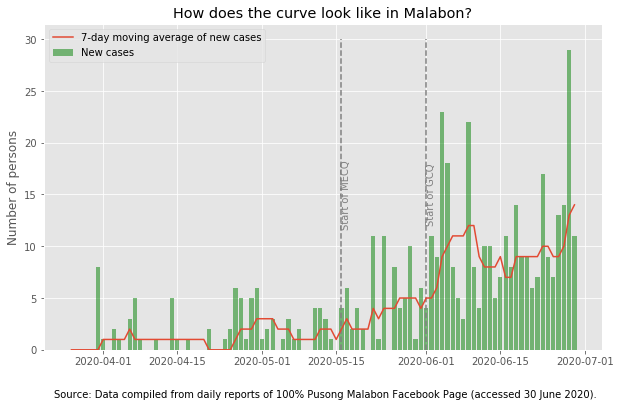

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='green', alpha=0.5, label='New cases')
ax.plot(df3.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 30, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 30, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('How does the curve look like in Malabon?')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (0,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.show()

In [53]:
df3.loc['Malabon City', 'new_case'].sort_values(ascending=False)

date
2020-06-28    29
2020-06-04    23
2020-06-09    22
2020-06-05    18
2020-06-23    17
              ..
2020-05-09     0
2020-04-22     0
2020-04-23     0
2020-05-25     0
2020-03-26     0
Name: new_case, Length: 96, dtype: int64

In [54]:
df3.loc['Malabon City', 'case_ma']['2020-05-16']

2

In [55]:
df3.loc['Malabon City', 'case_ma']['2020-06-29']

14

Average daily cases has been rising since the start of MECQ, and peaked late-June at almost 15 daily new infections on average.

How does the fatality and recovery rates compare with the curve?

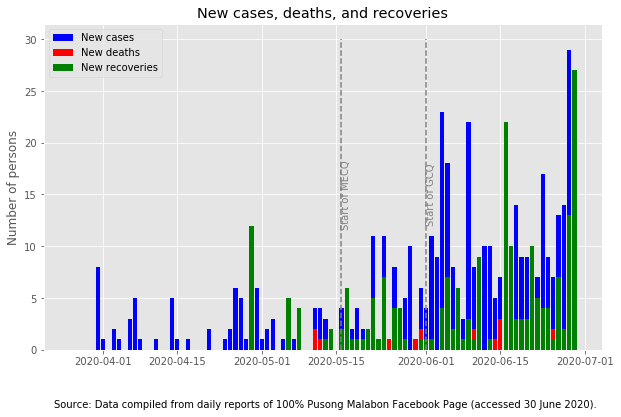

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='blue', label='New cases')
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_death'], color='red', label='New deaths')
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_recovered'], color='green', label='New recoveries')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 30, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 30, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('New cases, deaths, and recoveries')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (0,0), (10,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

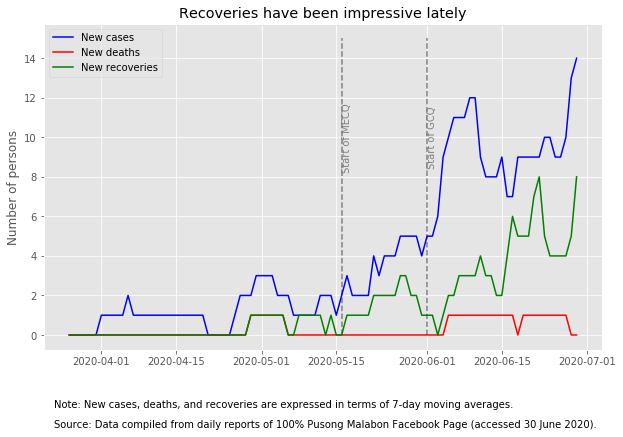

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df3.loc['Malabon City', 'case_ma'], label='New cases', color='blue')
ax.plot(df3.loc['Malabon City', 'death_ma'], label='New deaths', color='red')
ax.plot(df3.loc['Malabon City', 'recovered_ma'], label='New recoveries', color='green')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 15, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 15, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 10, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 10, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('Recoveries have been impressive lately')
ax.annotate('Note: New cases, deaths, and recoveries are expressed in terms of 7-day moving averages.', (0,0), (10,-50), 
            xycoords='axes fraction', textcoords='offset points', va='top')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (0,0), (10,-70), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [58]:
df3.loc['Malabon City', ['recovered_ma', 'death_ma']].max()

recovered_ma    8
death_ma        1
dtype: int64

Recovery rate has been impressive late June, peaking 8 recoveries daily on average. Fatality rate, meanwhile, falls in 1-2 deaths per day on average.

Let's look at the barangay level. Let's rank according to confirmed cases.

In [59]:
df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).iloc[1:, 5:9]

,confirmed,death,recovered,violators
brgy_name,,,,
Longos,73,12,37,1231
Tonsuya,47,3,26,845
Tugatog,45,3,18,449
Potrero,34,2,23,1066
Catmon,34,7,12,1513
Tinajeros,30,7,16,235
Tanong,28,4,12,443
Ibaba,26,3,11,79
San Agustin,25,2,8,264


In [60]:
brgy_confirmed = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'confirmed']

In [61]:
brgy_confirmed

brgy_name
Longos                 73
Tonsuya                47
Tugatog                45
Potrero                34
Catmon                 34
Tinajeros              30
Tanong                 28
Ibaba                  26
San Agustin            25
Bayan-Bayanan          23
Concepcion             17
Niugan                 15
Dampalit               14
Muzon                  11
Baritan                10
Hulong Duhat            7
Panghulo                6
Acacia                  5
Maysilo                 5
Santulan                4
Outside Malabon         4
Flores                  4
Unconfirmed Address     1
Name: confirmed, dtype: int64

In [62]:
brgy_deaths = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'death']

In [63]:
brgy_deaths

brgy_name
Longos                 12
Tonsuya                 3
Tugatog                 3
Potrero                 2
Catmon                  7
Tinajeros               7
Tanong                  4
Ibaba                   3
San Agustin             2
Bayan-Bayanan           4
Concepcion              1
Niugan                  1
Dampalit                0
Muzon                   1
Baritan                 0
Hulong Duhat            0
Panghulo                1
Acacia                  0
Maysilo                 1
Santulan                0
Outside Malabon         0
Flores                  1
Unconfirmed Address     0
Name: death, dtype: int64

In [64]:
brgy_recovered = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'recovered']

In [65]:
brgy_recovered

brgy_name
Longos                 37
Tonsuya                26
Tugatog                18
Potrero                23
Catmon                 12
Tinajeros              16
Tanong                 12
Ibaba                  11
San Agustin             8
Bayan-Bayanan           7
Concepcion              4
Niugan                 10
Dampalit                5
Muzon                   1
Baritan                 4
Hulong Duhat            6
Panghulo                2
Acacia                  2
Maysilo                 2
Santulan                0
Outside Malabon         3
Flores                  1
Unconfirmed Address     0
Name: recovered, dtype: int64

In [66]:
brgy_active = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc['Longos':, 'active']

In [67]:
brgy_active

brgy_name
Longos                 31
Tonsuya                28
Tugatog                25
Potrero                17
Catmon                 15
Tinajeros              10
Tanong                 16
Ibaba                  16
San Agustin            16
Bayan-Bayanan          13
Concepcion             12
Niugan                 10
Dampalit                9
Muzon                   9
Baritan                 7
Hulong Duhat            4
Panghulo                3
Acacia                  3
Maysilo                 4
Santulan                4
Outside Malabon         4
Flores                  2
Unconfirmed Address     1
Name: active, dtype: int64

In [68]:
brgy_cfr = df3.groupby(level=0).mean().sort_values(by='confirmed', ascending=False).loc['Longos':, 'cfr']

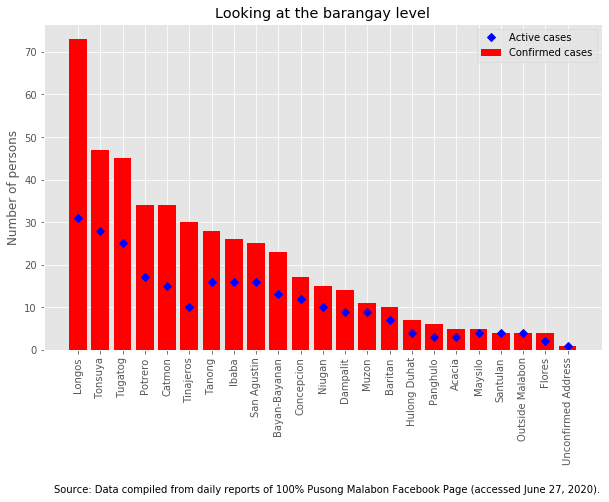

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(brgy_confirmed.index, brgy_confirmed, color='red', label='Confirmed cases')
ax.plot(brgy_active, 'bD', label='Active cases')
plt.xticks(rotation=90)
ax.set_title('Looking at the barangay level')
ax.set_xlabel('')
ax.set_ylabel('Number of persons')
ax.legend()
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-135), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

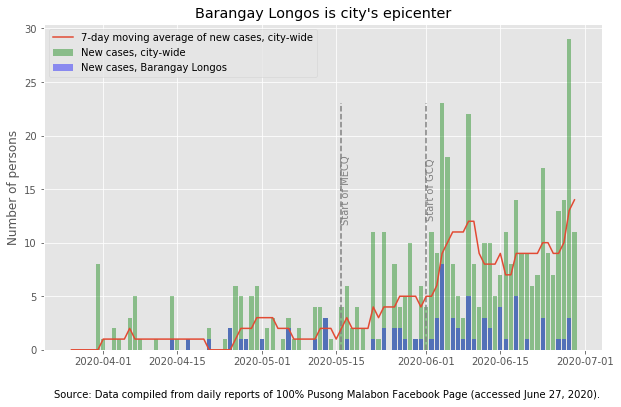

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='green', alpha=0.4, label='New cases, city-wide')
ax.bar(df3.loc['Longos'].index, df3.loc['Longos', 'new_case'], color='blue', alpha=0.4, label='New cases, Barangay Longos')
ax.plot(df3.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases, city-wide')
ax.vlines(df3.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax.vlines(df3.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('Barangay Longos is city\'s epicenter')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

How does the story differ when we look at per capita terms?

In [71]:
confirmed_pc2 = df3.groupby(level=0).max().sort_values(by='confirmed', ascending=False).loc[:, 'confirmed_pc_4k']

In [72]:
confirmed_pc2

brgy_name
Malabon City            5
Longos                  6
Tonsuya                 4
Tugatog                 7
Potrero                 3
Catmon                  3
Tinajeros               6
Tanong                  7
Ibaba                  13
San Agustin             8
Bayan-Bayanan          12
Concepcion              5
Niugan                 10
Dampalit                4
Muzon                   7
Baritan                 3
Hulong Duhat            2
Panghulo                1
Acacia                  3
Maysilo                 1
Santulan                1
Outside Malabon         0
Flores                  3
Unconfirmed Address     0
Name: confirmed_pc_4k, dtype: int64

In [73]:
mask2 = confirmed_pc2.index.isin(['Malabon City', 'Outside Malabon', 'Unconfirmed Address'])

In [74]:
confirmed_pc2[~mask2]

brgy_name
Longos            6
Tonsuya           4
Tugatog           7
Potrero           3
Catmon            3
Tinajeros         6
Tanong            7
Ibaba            13
San Agustin       8
Bayan-Bayanan    12
Concepcion        5
Niugan           10
Dampalit          4
Muzon             7
Baritan           3
Hulong Duhat      2
Panghulo          1
Acacia            3
Maysilo           1
Santulan          1
Flores            3
Name: confirmed_pc_4k, dtype: int64

In [75]:
mask3 = brgy_confirmed.index.isin(['Malabon City', 'Outside Malabon', 'Unconfirmed Address'])

In [76]:
brgy_confirmed[~mask3]

brgy_name
Longos           73
Tonsuya          47
Tugatog          45
Potrero          34
Catmon           34
Tinajeros        30
Tanong           28
Ibaba            26
San Agustin      25
Bayan-Bayanan    23
Concepcion       17
Niugan           15
Dampalit         14
Muzon            11
Baritan          10
Hulong Duhat      7
Panghulo          6
Acacia            5
Maysilo           5
Santulan          4
Flores            4
Name: confirmed, dtype: int64

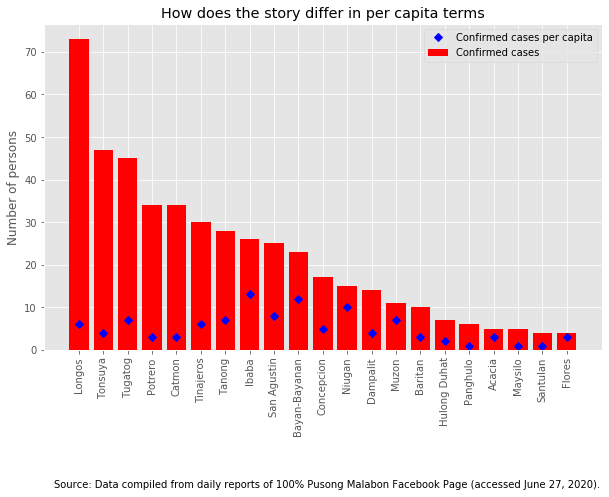

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(brgy_confirmed.index[~mask3], brgy_confirmed[~mask3], color='red', label='Confirmed cases')
ax.plot(confirmed_pc2[~mask2], 'bD', label='Confirmed cases per capita')
plt.xticks(rotation=90)
ax.set_title('How does the story differ in per capita terms')
ax.set_xlabel('')
ax.set_ylabel('Number of persons')
ax.legend()
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-130), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

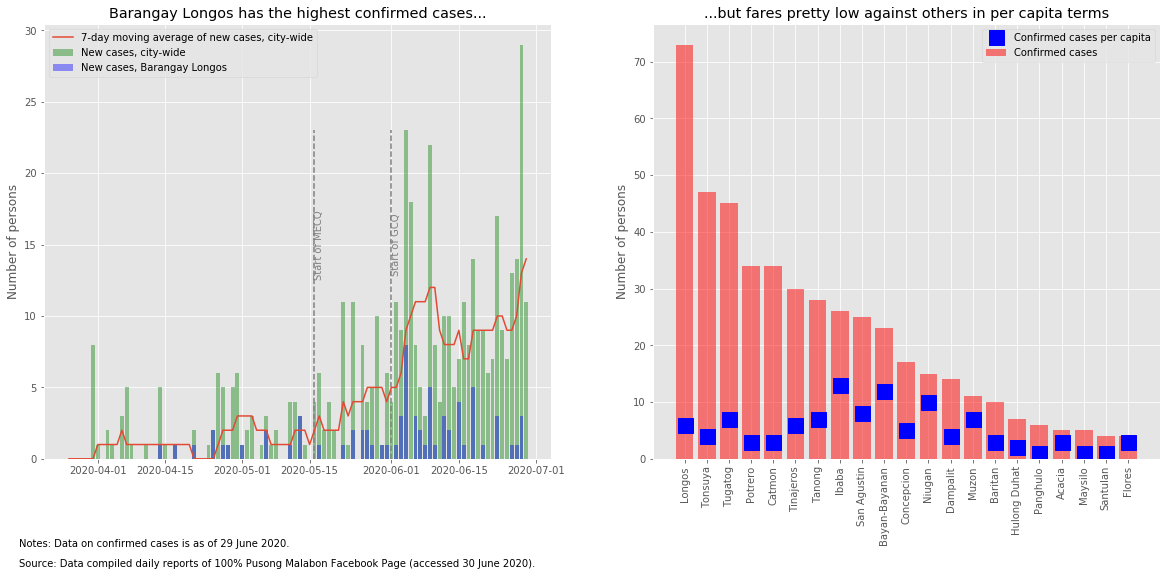

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.bar(df3.loc['Malabon City'].index, df3.loc['Malabon City', 'new_case'], color='green', alpha=0.4, label='New cases, city-wide')
ax1.bar(df3.loc['Longos'].index, df3.loc['Longos', 'new_case'], color='blue', alpha=0.4, label='New cases, Barangay Longos')
ax1.plot(df3.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases, city-wide')
ax1.vlines(df3.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax1.vlines(df3.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax1.text(df3.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax1.text(df3.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax1.legend(loc='upper left')
ax1.set_title('Barangay Longos has the highest confirmed cases...')
ax1.set_ylabel('Number of persons')
plt.xticks(rotation=90)

ax2.bar(brgy_confirmed.index[~mask3], brgy_confirmed[~mask3], color='red', 
        alpha=0.5, label='Confirmed cases')
ax2.plot(confirmed_pc2[~mask2], 'bs', markersize=15, label='Confirmed cases per capita')
plt.xticks(rotation=90)
ax2.set_title('...but fares pretty low against others in per capita terms')
ax2.set_ylabel('Number of persons')
ax2.legend()

plt.annotate('Notes: Data on confirmed cases is as of 29 June 2020.', 
            (-1.25,0), (0,-80), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: Data compiled daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (-1.25,0), (0,-100), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Now let's look at violations.

In [79]:
df3.groupby(level=0).max().loc[:, 'confirmed'].sort_values(ascending=False)[~mask2]

brgy_name
Longos           73
Tonsuya          47
Tugatog          45
Catmon           34
Potrero          34
Tinajeros        30
Tanong           28
Ibaba            26
San Agustin      25
Bayan-Bayanan    23
Concepcion       17
Niugan           15
Dampalit         14
Muzon            11
Baritan          10
Hulong Duhat      7
Panghulo          6
Maysilo           5
Acacia            5
Flores            4
Santulan          4
Name: confirmed, dtype: int64

In [80]:
df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'violators'][~mask2]

brgy_name
Longos           1231
Tonsuya           845
Tugatog           449
Potrero          1066
Catmon           1513
Tinajeros         235
Tanong            443
Ibaba              79
San Agustin       264
Bayan-Bayanan      75
Concepcion        847
Niugan             37
Dampalit           77
Muzon             151
Baritan           106
Hulong Duhat      340
Panghulo          174
Acacia            294
Maysilo           127
Santulan          162
Flores             78
Name: violators, dtype: int64

In [81]:
scatter_y1 = df3.groupby(level=0).max().loc[:, 'confirmed'].sort_values(ascending=False)[~mask2]
scatter_y2 = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'active'][~mask2]
scatter_y3 = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'death'][~mask2]
scatter_x1 = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'violators'][~mask2]
scatter_z1 = df3.groupby(level=0).max().sort_values(by=['confirmed'], ascending=False).loc[:, 'popden'][~mask2]

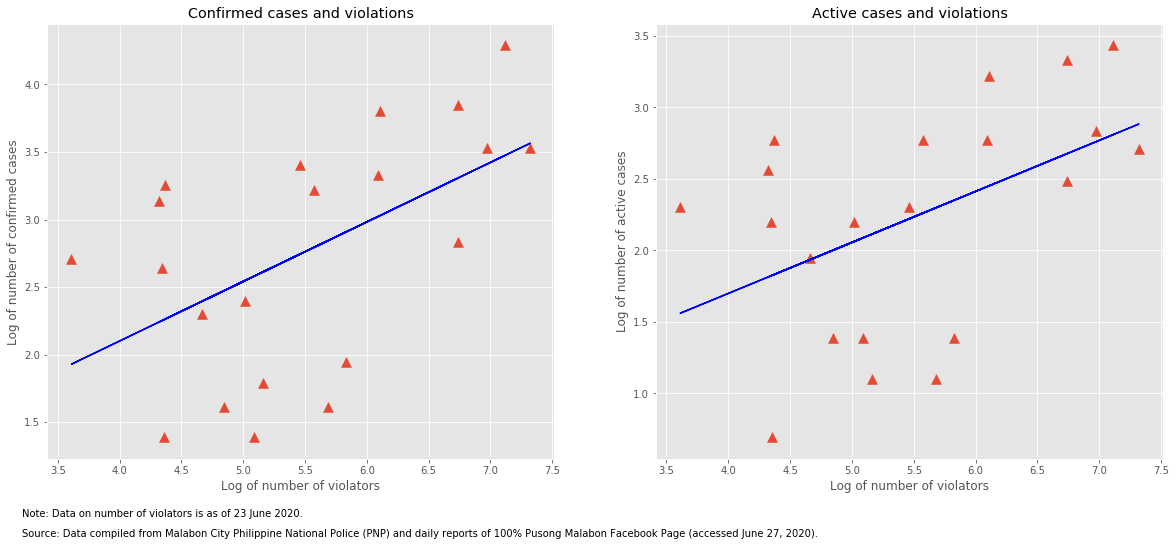

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.scatter(np.log(scatter_x1), np.log(scatter_y1), marker='^', s=100)
ax1.set_ylabel('Log of number of confirmed cases')
ax1.set_xlabel('Log of number of violators')
m1, b1 = np.polyfit(np.log(scatter_x1), np.log(scatter_y1), deg=1)
ax1.plot(np.log(scatter_x1), m1 * np.log(scatter_x1) + b1, color='blue')
ax1.set_title('Confirmed cases and violations')

ax2.scatter(np.log(scatter_x1), np.log(scatter_y2), marker='^', s=100)
ax2.set_ylabel('Log of number of active cases')
ax2.set_xlabel('Log of number of violators')
m2, b2 = np.polyfit(np.log(scatter_x1), np.log(scatter_y2), deg=1)
ax2.plot(np.log(scatter_x1), m2 * np.log(scatter_x1) + b2, color='blue')
ax2.set_title('Active cases and violations')

plt.annotate('Note: Data on number of violators is as of 23 June 2020.', 
            (-1.25,0), (0,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: Data compiled from Malabon City Philippine National Police (PNP) and daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (-1.25,0), (0,-70), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()    

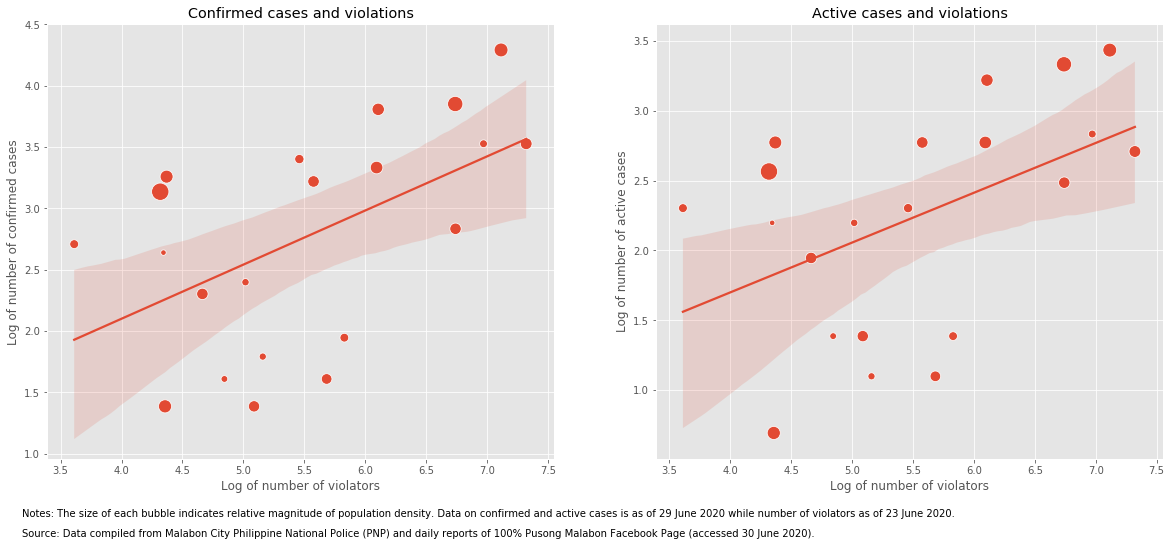

In [83]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.regplot(x=np.log(scatter_x1), y=np.log(scatter_y1), scatter=False, ax=ax1)
sns.scatterplot(x=np.log(scatter_x1), y=np.log(scatter_y1), 
                     size=scatter_z1, sizes=(30, 300),
                     legend=False, ax=ax1)
ax1.set(title='Confirmed cases and violations',
        xlabel='Log of number of violators', 
        ylabel='Log of number of confirmed cases')

sns.regplot(x=np.log(scatter_x1), y=np.log(scatter_y2), scatter=False, ax=ax2)
sns.scatterplot(x=np.log(scatter_x1), y=np.log(scatter_y2), 
                     size=scatter_z1, sizes=(30, 300),
                     legend=False, ax=ax2)
ax2.set(title='Active cases and violations',
        xlabel='Log of number of violators', 
        ylabel='Log of number of active cases')

plt.annotate('Notes: The size of each bubble indicates relative magnitude of population density. Data on confirmed and active cases is as of 29 June 2020 while number of violators as of 23 June 2020.', 
            (-1.25,0), (0,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: Data compiled from Malabon City Philippine National Police (PNP) and daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (-1.25,0), (0,-70), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

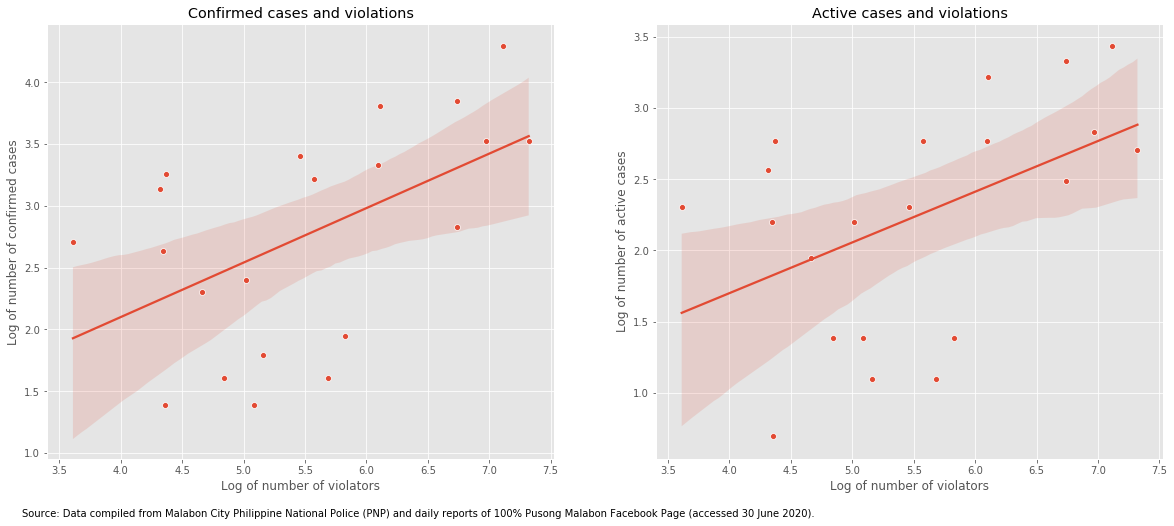

In [84]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.regplot(x=np.log(scatter_x1), y=np.log(scatter_y1), scatter=False, ax=ax1)
sns.scatterplot(x=np.log(scatter_x1), y=np.log(scatter_y1), 
                     legend=False, ax=ax1)
ax1.set(title='Confirmed cases and violations',
        xlabel='Log of number of violators', 
        ylabel='Log of number of confirmed cases')

sns.regplot(x=np.log(scatter_x1), y=np.log(scatter_y2), scatter=False, ax=ax2)
sns.scatterplot(x=np.log(scatter_x1), y=np.log(scatter_y2), 
                     legend=False, ax=ax2)
ax2.set(title='Active cases and violations',
        xlabel='Log of number of violators', 
        ylabel='Log of number of active cases')

plt.annotate('Source: Data compiled from Malabon City Philippine National Police (PNP) and daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (-1.25,0), (0,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Let's look at case fatality rates.

In [85]:
df3.groupby(level=0).mean().loc[:, 'cfr'].sort_values(ascending=False)

brgy_name
Bayan-Bayanan          34.760417
Maysilo                33.072917
Catmon                 17.687500
Tinajeros              16.479167
Tanong                 11.781250
Tonsuya                 9.802083
Longos                  9.468750
Ibaba                   9.229167
Malabon City            8.802083
Flores                  5.468750
Potrero                 5.312500
Muzon                   5.260417
Tugatog                 3.843750
Niugan                  3.718750
Concepcion              1.500000
Panghulo                0.666667
San Agustin             0.583333
Baritan                 0.000000
Unconfirmed Address     0.000000
Dampalit                0.000000
Hulong Duhat            0.000000
Outside Malabon         0.000000
Santulan                0.000000
Acacia                  0.000000
Name: cfr, dtype: float64

In [86]:
average_cfr = df3.groupby(level=0).mean().loc[:, 'cfr'].sort_values(ascending=False)

In [87]:
average_cfr.index

Index(['Bayan-Bayanan', 'Maysilo', 'Catmon', 'Tinajeros', 'Tanong', 'Tonsuya',
       'Longos', 'Ibaba', 'Malabon City', 'Flores', 'Potrero', 'Muzon',
       'Tugatog', 'Niugan', 'Concepcion', 'Panghulo', 'San Agustin', 'Baritan',
       'Unconfirmed Address', 'Dampalit', 'Hulong Duhat', 'Outside Malabon',
       'Santulan', 'Acacia'],
      dtype='object', name='brgy_name')

In [88]:
cfr_eop = df3.xs('2020-06-29', level=1).loc[:, 'cfr'].sort_values(ascending=False)

In [89]:
mask4 = average_cfr.index.isin(['Unconfirmed Address', 'Outside Malabon'])

In [90]:
mask4

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False])

In [91]:
mask5 = cfr_eop.index.isin(['Unconfirmed Address', 'Outside Malabon'])

In [92]:
average_cfr[~mask4]

brgy_name
Bayan-Bayanan    34.760417
Maysilo          33.072917
Catmon           17.687500
Tinajeros        16.479167
Tanong           11.781250
Tonsuya           9.802083
Longos            9.468750
Ibaba             9.229167
Malabon City      8.802083
Flores            5.468750
Potrero           5.312500
Muzon             5.260417
Tugatog           3.843750
Niugan            3.718750
Concepcion        1.500000
Panghulo          0.666667
San Agustin       0.583333
Baritan           0.000000
Dampalit          0.000000
Hulong Duhat      0.000000
Santulan          0.000000
Acacia            0.000000
Name: cfr, dtype: float64

In [93]:
cfr_eop[~mask5]

brgy_name
Flores           25
Tinajeros        23
Catmon           20
Maysilo          20
Bayan-Bayanan    17
Panghulo         16
Longos           16
Tanong           14
Malabon City     11
Ibaba            11
Muzon             9
San Agustin       8
Niugan            6
Tonsuya           6
Tugatog           6
Potrero           5
Concepcion        5
Santulan          0
Hulong Duhat      0
Dampalit          0
Baritan           0
Acacia            0
Name: cfr, dtype: int64

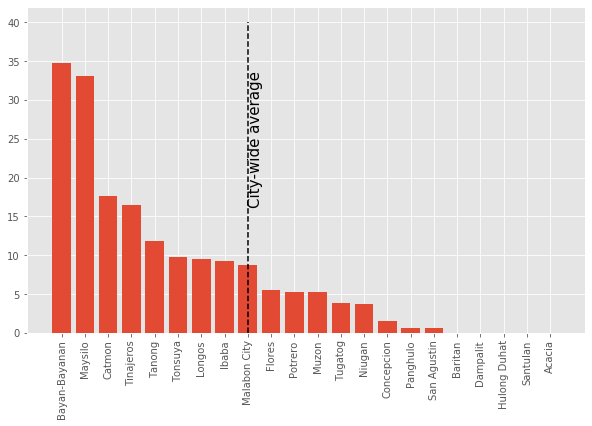

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(average_cfr.index[~mask4], average_cfr[~mask4])
ax.vlines(average_cfr.index[~mask4][8], 0, 40, linestyles='dashed')
ax.text(average_cfr.index[~mask4][8], 25, 'City-wide average', 
        verticalalignment='center', rotation=90, fontsize=15)
plt.xticks(rotation=90)
plt.show()

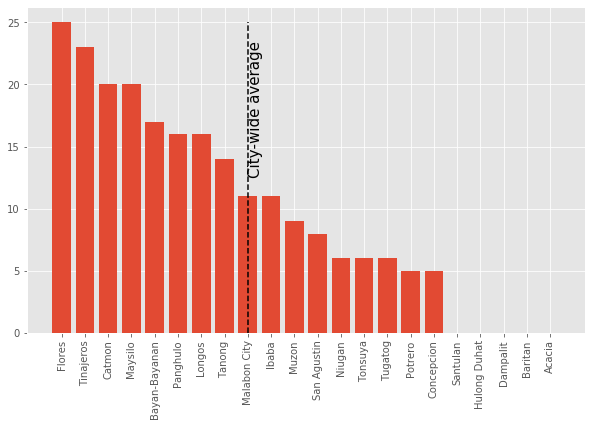

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(cfr_eop.index[~mask5], cfr_eop[~mask5])
ax.vlines(average_cfr.index[~mask5][8], 0, 25, linestyles='dashed')
ax.text(average_cfr.index[~mask5][8], 18, 'City-wide average', 
        verticalalignment='center', rotation=90, fontsize=15)
plt.xticks(rotation=90)
plt.show()

C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


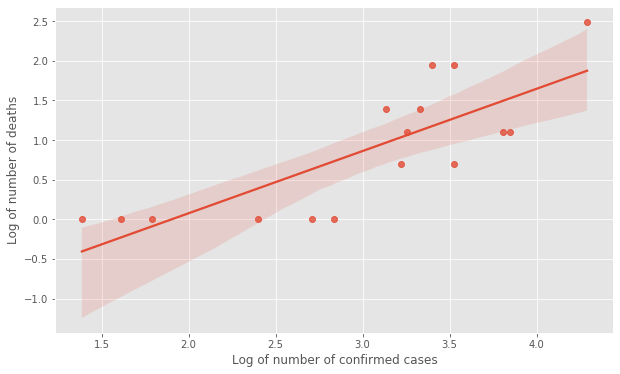

In [96]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(np.log(scatter_y1)[scatter_y3 > 0], 
            np.log(scatter_y3)[scatter_y3 > 0])
ax.set(xlabel='Log of number of confirmed cases', ylabel='Log of number of deaths')
plt.show()

C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


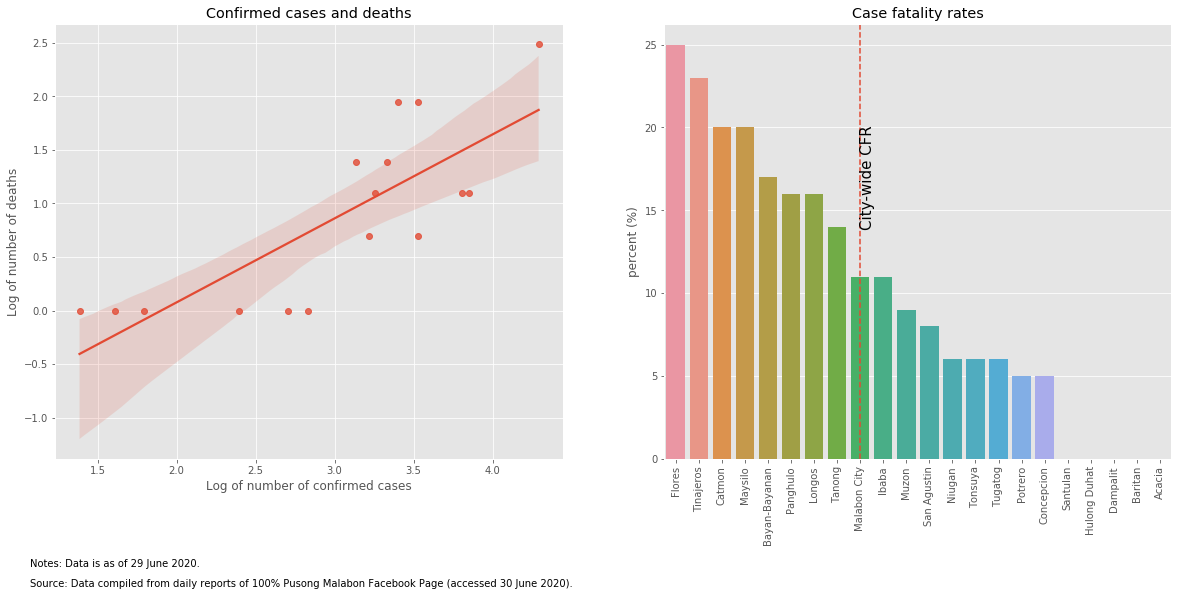

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.regplot(np.log(scatter_y1)[scatter_y3 > 0], 
            np.log(scatter_y3)[scatter_y3 > 0],
            ax=ax1)
ax1.set(title='Confirmed cases and deaths',
        xlabel='Log of number of confirmed cases', 
        ylabel='Log of number of deaths')

sns.barplot(cfr_eop.index[~mask5], cfr_eop[~mask5], ax=ax2)
plt.axvline(8, 0, 35, linestyle='--')
plt.text(8, 17, 'City-wide CFR', 
        verticalalignment='center', rotation=90, fontsize=15)
ax2.set(title='Case fatality rates', xlabel='', ylabel='percent (%)')
plt.xticks(rotation=90)

plt.annotate('Notes: Data is as of 29 June 2020.', 
            (-1.25,0), (0,-100), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (-1.25,0), (0,-120), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()


In [107]:
df3.assign(mortality_rate = lambda x: 100000 * x.death / x.population).groupby(level=0).mean().loc[:, 'mortality_rate'].sort_values(ascending=False)

brgy_name
Bayan-Bayanan          20.617208
Tinajeros              13.558367
Ibaba                  13.515727
Tanong                 10.188668
Longos                  7.350798
Niugan                  6.843834
Catmon                  5.801326
Malabon City            4.711063
Maysilo                 4.644906
Muzon                   4.394445
Tugatog                 3.311919
Tonsuya                 3.149828
Flores                  2.675930
Potrero                 2.314423
San Agustin             1.307219
Concepcion              0.882320
Panghulo                0.326234
Hulong Duhat            0.000000
Dampalit                0.000000
Santulan                0.000000
Baritan                 0.000000
Acacia                  0.000000
Outside Malabon              NaN
Unconfirmed Address          NaN
Name: mortality_rate, dtype: float64

In [109]:
df3 = df3.assign(mortality_rate = lambda x: 100000 * x.death / x.population)

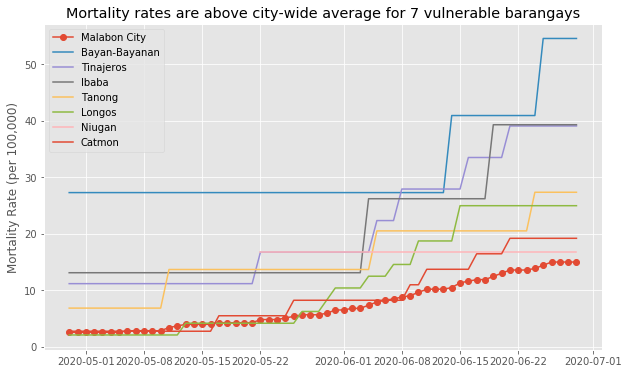

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df3.loc['Malabon City', 'mortality_rate'][df3.loc['Malabon City', 'mortality_rate'] > 0], 
        marker='o', label='Malabon City')
ax.plot(df3.loc['Bayan-Bayanan', 'mortality_rate'][df3.loc['Bayan-Bayanan', 'mortality_rate'] > 0],
        label='Bayan-Bayanan')
ax.plot(df3.loc['Tinajeros', 'mortality_rate'][df3.loc['Tinajeros', 'mortality_rate'] > 0],
        label='Tinajeros')
ax.plot(df3.loc['Ibaba', 'mortality_rate'][df3.loc['Ibaba', 'mortality_rate'] > 0],
        label='Ibaba')
ax.plot(df3.loc['Tanong', 'mortality_rate'][df3.loc['Tanong', 'mortality_rate'] > 0],
        label='Tanong')
ax.plot(df3.loc['Longos', 'mortality_rate'][df3.loc['Longos', 'mortality_rate'] > 0],
        label='Longos')
ax.plot(df3.loc['Niugan', 'mortality_rate'][df3.loc['Niugan', 'mortality_rate'] > 0],
        label='Niugan')
ax.plot(df3.loc['Catmon', 'mortality_rate'][df3.loc['Catmon', 'mortality_rate'] > 0],
        label='Catmon')


ax.set_title('Mortality rates are above city-wide average for 7 vulnerable barangays')
ax.set_ylabel('Mortality Rate (per 100,000)')
ax.set_xlim(auto=False)
ax.legend()
plt.show()

In [166]:
scatter_y1

brgy_name
Longos           73
Tonsuya          47
Tugatog          45
Catmon           34
Potrero          34
Tinajeros        30
Tanong           28
Ibaba            26
San Agustin      25
Bayan-Bayanan    23
Concepcion       17
Niugan           15
Dampalit         14
Muzon            11
Baritan          10
Hulong Duhat      7
Panghulo          6
Maysilo           5
Acacia            5
Flores            4
Santulan          4
Name: confirmed, dtype: int64

In [172]:
df3.groupby(level=0).max().loc[:, 'mortality_rate'].sort_values(ascending=False)

brgy_name
Bayan-Bayanan          54.600055
Ibaba                  39.318480
Tinajeros              39.103961
Tanong                 27.359781
Longos                 24.979704
Flores                 23.353573
Catmon                 19.204390
San Agustin            17.927573
Muzon                  17.577782
Niugan                 16.846361
Malabon City           14.999929
Tugatog                13.066202
Maysilo                 8.918220
Concepcion              8.470269
Panghulo                7.829627
Tonsuya                 7.623113
Potrero                 4.830101
Hulong Duhat            0.000000
Dampalit                0.000000
Santulan                0.000000
Baritan                 0.000000
Acacia                  0.000000
Outside Malabon              NaN
Unconfirmed Address          NaN
Name: mortality_rate, dtype: float64

In [175]:
scatter_mr = df3.groupby(level=0).max().sort_values(by='mortality_rate', ascending=False).loc[:, 'mortality_rate']

In [176]:
scatter_mr

brgy_name
Bayan-Bayanan          54.600055
Ibaba                  39.318480
Tinajeros              39.103961
Tanong                 27.359781
Longos                 24.979704
Flores                 23.353573
Catmon                 19.204390
San Agustin            17.927573
Muzon                  17.577782
Niugan                 16.846361
Malabon City           14.999929
Tugatog                13.066202
Maysilo                 8.918220
Concepcion              8.470269
Panghulo                7.829627
Tonsuya                 7.623113
Potrero                 4.830101
Baritan                 0.000000
Hulong Duhat            0.000000
Santulan                0.000000
Dampalit                0.000000
Acacia                  0.000000
Outside Malabon              NaN
Unconfirmed Address          NaN
Name: mortality_rate, dtype: float64

In [177]:
scatter_cc = df3.groupby(level=0).max().sort_values(by='mortality_rate', ascending=False).loc[:, 'confirmed']

In [178]:
scatter_cc

brgy_name
Bayan-Bayanan           23
Ibaba                   26
Tinajeros               30
Tanong                  28
Longos                  73
Flores                   4
Catmon                  34
San Agustin             25
Muzon                   11
Niugan                  15
Malabon City           468
Tugatog                 45
Maysilo                  5
Concepcion              17
Panghulo                 6
Tonsuya                 47
Potrero                 34
Baritan                 10
Hulong Duhat             7
Santulan                 4
Dampalit                14
Acacia                   5
Outside Malabon          4
Unconfirmed Address      1
Name: confirmed, dtype: int64

In [179]:
mask6 = scatter_cc.index.isin(['Outside Malabon', 'Unconfirmed Address', 'Malabon City'])

In [183]:
scatter_mr = scatter_mr[~mask6]
scatter_cc = scatter_cc[~mask6]

In [184]:
scatter_mr

brgy_name
Bayan-Bayanan    54.600055
Ibaba            39.318480
Tinajeros        39.103961
Tanong           27.359781
Longos           24.979704
Flores           23.353573
Catmon           19.204390
San Agustin      17.927573
Muzon            17.577782
Niugan           16.846361
Tugatog          13.066202
Maysilo           8.918220
Concepcion        8.470269
Panghulo          7.829627
Tonsuya           7.623113
Potrero           4.830101
Baritan           0.000000
Hulong Duhat      0.000000
Santulan          0.000000
Dampalit          0.000000
Acacia            0.000000
Name: mortality_rate, dtype: float64

In [185]:
scatter_cc

brgy_name
Bayan-Bayanan    23
Ibaba            26
Tinajeros        30
Tanong           28
Longos           73
Flores            4
Catmon           34
San Agustin      25
Muzon            11
Niugan           15
Tugatog          45
Maysilo           5
Concepcion       17
Panghulo          6
Tonsuya          47
Potrero          34
Baritan          10
Hulong Duhat      7
Santulan          4
Dampalit         14
Acacia            5
Name: confirmed, dtype: int64

C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


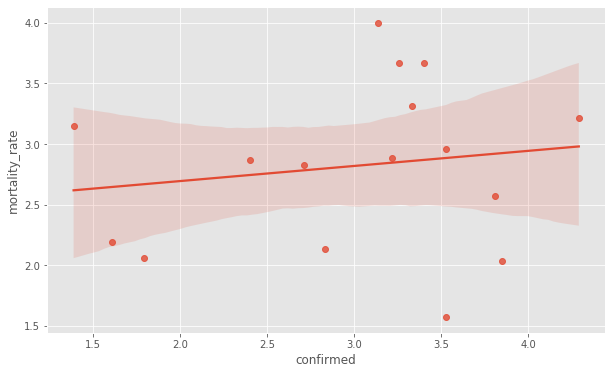

In [186]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x=np.log(scatter_cc)[scatter_mr > 0], y=np.log(scatter_mr)[scatter_mr > 0])
plt.show()

C:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


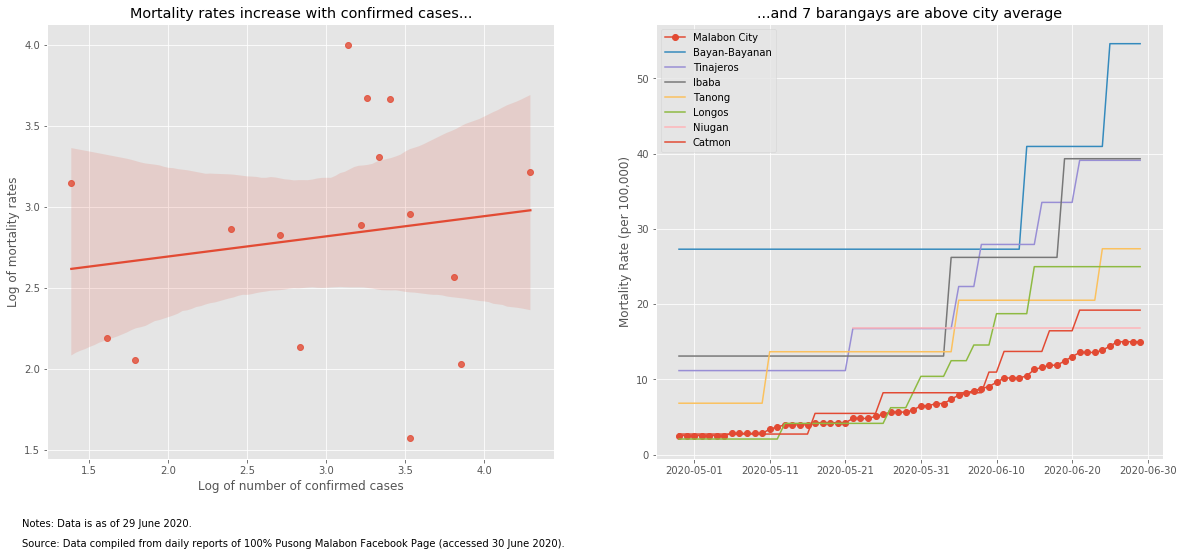

In [207]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.regplot(x=np.log(scatter_cc)[scatter_mr > 0], y=np.log(scatter_mr)[scatter_mr > 0], ax=ax1)
ax1.set(title='Mortality rates increase with confirmed cases...',
        ylabel='Log of mortality rates',
        xlabel='Log of number of confirmed cases')

ax2.plot(df3.loc['Malabon City', 'mortality_rate'][df3.loc['Malabon City', 'mortality_rate'] > 0], 
        marker='o', label='Malabon City')
ax2.plot(df3.loc['Bayan-Bayanan', 'mortality_rate'][df3.loc['Bayan-Bayanan', 'mortality_rate'] > 0],
        label='Bayan-Bayanan')
ax2.plot(df3.loc['Tinajeros', 'mortality_rate'][df3.loc['Tinajeros', 'mortality_rate'] > 0],
        label='Tinajeros')
ax2.plot(df3.loc['Ibaba', 'mortality_rate'][df3.loc['Ibaba', 'mortality_rate'] > 0],
        label='Ibaba')
ax2.plot(df3.loc['Tanong', 'mortality_rate'][df3.loc['Tanong', 'mortality_rate'] > 0],
        label='Tanong')
ax2.plot(df3.loc['Longos', 'mortality_rate'][df3.loc['Longos', 'mortality_rate'] > 0],
        label='Longos')
ax2.plot(df3.loc['Niugan', 'mortality_rate'][df3.loc['Niugan', 'mortality_rate'] > 0],
        label='Niugan')
ax2.plot(df3.loc['Catmon', 'mortality_rate'][df3.loc['Catmon', 'mortality_rate'] > 0],
        label='Catmon')
ax2.set_title('...and 7 barangays are above city average')
ax2.set_ylabel('Mortality Rate (per 100,000)')
ax2.set_xticks(np.arange(np.datetime64('2020-05-01'), np.datetime64('2020-07-01'), 10))
ax2.legend()

plt.annotate('Notes: Data is as of 29 June 2020.', 
            (-1.25,0), (0,-60), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed 30 June 2020).', 
            (-1.25,0), (0,-80), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()


In [208]:
df3.loc['Malabon City', 'mortality_rate']['2020-04-30']

2.5471577964254886

In [210]:
df3.loc['Malabon City', 'mortality_rate']['2020-06-29']

14.999929245616766